In [2]:
# TASK 1 : 	Tensor Manipulations & Reshaping


import tensorflow as tf

# Step 1: Create a random tensor of shape (4, 6)
tensor = tf.random.uniform(shape=(4, 6), minval=0, maxval=10, dtype=tf.float32)

# Step 2: Find its rank and shape
rank = tf.rank(tensor)  # Finding the rank
shape = tf.shape(tensor)  # Finding the shape

print("Original Tensor:")
print(tensor.numpy())
print(f"Rank: {rank.numpy()}, Shape: {shape.numpy()}")

# Step 3: Reshape to (2, 3, 4) and Transpose to (3, 2, 4)
reshaped_tensor = tf.reshape(tensor, (2, 3, 4))
transposed_tensor = tf.transpose(reshaped_tensor, perm=[1, 0, 2])

print("\nReshaped Tensor (2,3,4):")
print(reshaped_tensor.numpy())
print("\nTransposed Tensor (3,2,4):")
print(transposed_tensor.numpy())

# Step 4: Broadcasting a smaller tensor (1,4) and adding it
small_tensor = tf.constant([[1, 2, 3, 4]], dtype=tf.float32)  # Shape (1, 4)
broadcasted_tensor = transposed_tensor + small_tensor  # Broadcasting and addition

print("\nBroadcasted and Added Tensor:")
print(broadcasted_tensor.numpy())

# Step 5: Explanation of Broadcasting in TensorFlow
"""
Broadcasting in TensorFlow allows operations between tensors of different shapes by expanding
the smaller tensor along singleton dimensions to match the larger tensor. The rules of broadcasting
follow NumPy's broadcasting semantics:
- If the dimensions of two tensors are different, TensorFlow automatically expands the smaller tensor
  to match the larger tensor by virtually replicating its values along the missing dimensions.
- If a dimension is 1 in the smaller tensor, it gets stretched to match the corresponding dimension
  of the larger tensor.
"""

Original Tensor:
[[6.730933   3.2392704  7.4580646  6.547879   8.967737   5.0583515 ]
 [8.7871275  5.7943964  3.663386   7.360561   1.7984116  7.7148724 ]
 [9.29604    3.3852804  0.33263087 1.8023968  8.873019   7.6275253 ]
 [0.9949541  1.6292834  9.58894    6.0571423  8.997286   9.504685  ]]
Rank: 2, Shape: [4 6]

Reshaped Tensor (2,3,4):
[[[6.730933   3.2392704  7.4580646  6.547879  ]
  [8.967737   5.0583515  8.7871275  5.7943964 ]
  [3.663386   7.360561   1.7984116  7.7148724 ]]

 [[9.29604    3.3852804  0.33263087 1.8023968 ]
  [8.873019   7.6275253  0.9949541  1.6292834 ]
  [9.58894    6.0571423  8.997286   9.504685  ]]]

Transposed Tensor (3,2,4):
[[[6.730933   3.2392704  7.4580646  6.547879  ]
  [9.29604    3.3852804  0.33263087 1.8023968 ]]

 [[8.967737   5.0583515  8.7871275  5.7943964 ]
  [8.873019   7.6275253  0.9949541  1.6292834 ]]

 [[3.663386   7.360561   1.7984116  7.7148724 ]
  [9.58894    6.0571423  8.997286   9.504685  ]]]

Broadcasted and Added Tensor:
[[[ 7.730933 

"\nBroadcasting in TensorFlow allows operations between tensors of different shapes by expanding\nthe smaller tensor along singleton dimensions to match the larger tensor. The rules of broadcasting\nfollow NumPy's broadcasting semantics:\n- If the dimensions of two tensors are different, TensorFlow automatically expands the smaller tensor\n  to match the larger tensor by virtually replicating its values along the missing dimensions.\n- If a dimension is 1 in the smaller tensor, it gets stretched to match the corresponding dimension\n  of the larger tensor.\n"

Mean Squared Error (MSE) for first predictions: 0.02500000037252903
Mean Squared Error (MSE) for modified predictions: 0.06499999761581421
Categorical Cross-Entropy (CCE) for first predictions: 0.3566749691963196
Categorical Cross-Entropy (CCE) for modified predictions: 0.5108255743980408


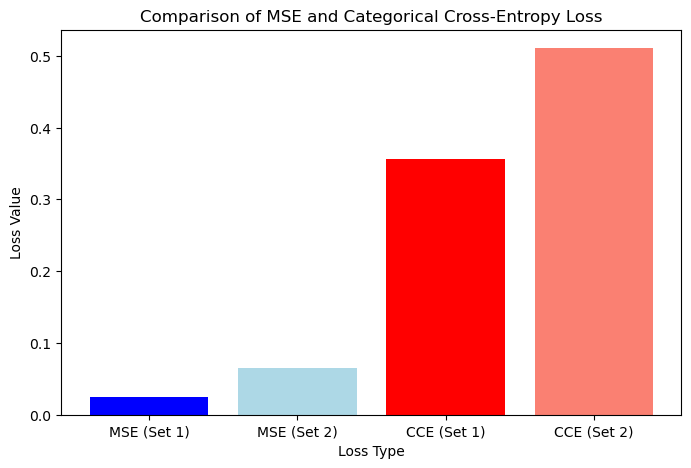

In [4]:
#TASK 2 : Loss Functions & Hyperparameter Tuning

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define true values (y_true) and model predictions (y_pred)
y_true = tf.constant([0.0, 1.0, 1.0, 0.0], dtype=tf.float32)  # Binary labels
y_pred_1 = tf.constant([0.1, 0.9, 0.8, 0.2], dtype=tf.float32)  # First set of predictions
y_pred_2 = tf.constant([0.2, 0.8, 0.7, 0.3], dtype=tf.float32)  # Slightly modified predictions

# Step 2: Compute Mean Squared Error (MSE)
mse_1 = tf.keras.losses.MeanSquaredError()(y_true, y_pred_1).numpy()
mse_2 = tf.keras.losses.MeanSquaredError()(y_true, y_pred_2).numpy()

# Step 3: Compute Categorical Cross-Entropy (CCE)
# Simulating one-hot encoded categorical data
y_true_categorical = tf.constant([[0, 1, 0], [0, 0, 1]], dtype=tf.float32)  # True labels
y_pred_categorical_1 = tf.constant([[0.2, 0.7, 0.1], [0.1, 0.2, 0.7]], dtype=tf.float32)
y_pred_categorical_2 = tf.constant([[0.3, 0.6, 0.1], [0.1, 0.3, 0.6]], dtype=tf.float32)

cce_1 = tf.keras.losses.CategoricalCrossentropy()(y_true_categorical, y_pred_categorical_1).numpy()
cce_2 = tf.keras.losses.CategoricalCrossentropy()(y_true_categorical, y_pred_categorical_2).numpy()

# Print loss values
print(f"Mean Squared Error (MSE) for first predictions: {mse_1}")
print(f"Mean Squared Error (MSE) for modified predictions: {mse_2}")
print(f"Categorical Cross-Entropy (CCE) for first predictions: {cce_1}")
print(f"Categorical Cross-Entropy (CCE) for modified predictions: {cce_2}")

# Step 4: Plot loss function values using Matplotlib
labels = ["MSE (Set 1)", "MSE (Set 2)", "CCE (Set 1)", "CCE (Set 2)"]
loss_values = [mse_1, mse_2, cce_1, cce_2]

plt.figure(figsize=(8, 5))
plt.bar(labels, loss_values, color=['blue', 'lightblue', 'red', 'salmon'])
plt.xlabel("Loss Type")
plt.ylabel("Loss Value")
plt.title("Comparison of MSE and Categorical Cross-Entropy Loss")
plt.show()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.8799 - loss: 0.4256 - val_accuracy: 0.9583 - val_loss: 0.1487
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - accuracy: 0.9647 - loss: 0.1221 - val_accuracy: 0.9694 - val_loss: 0.1001
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - accuracy: 0.9766 - loss: 0.0806 - val_accuracy: 0.9670 - val_loss: 0.1045
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.9820 - loss: 0.0589 - val_accuracy: 0.9764 - val_loss: 0.0786
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.9869 - loss: 0.0417 - val_accuracy: 0.9779 - val_loss: 0.0741
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9901 - loss: 0.0321 - val_accuracy: 0.9772 - val_loss: 0.0747
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.9923 - loss: 0.0262 - val_accuracy: 0.9771 - val_loss: 0.0767
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9943 - los

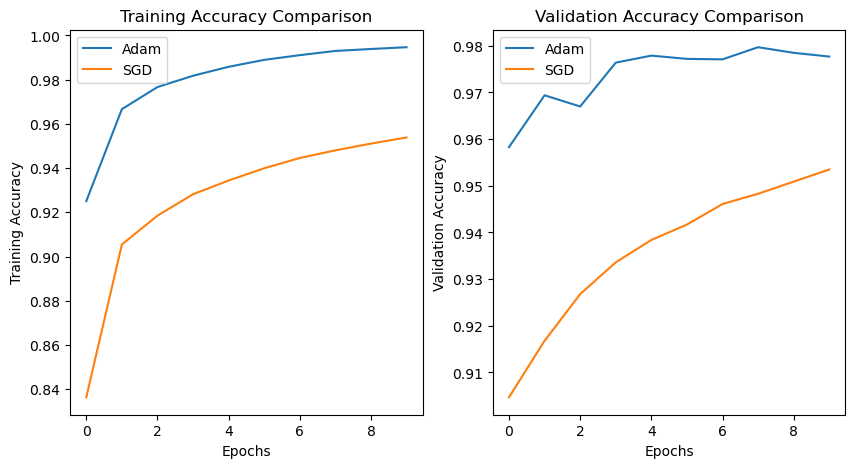

In [8]:
#TASK 3:  	Train a Model with Different Optimizers

import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to the range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images for a simple neural network
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Define a simple feedforward neural network model
def create_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Step 2: Train models with Adam and SGD optimizers
adam_model = create_model(optimizer='adam')
sgd_model = create_model(optimizer='sgd')

# Train both models and store training history
history_adam = adam_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)
history_sgd = sgd_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)

# Step 3: Compare training and validation accuracy trends
plt.figure(figsize=(10,5))

# Plot training accuracy
plt.subplot(1,2,1)
plt.plot(history_adam.history['accuracy'], label='Adam')
plt.plot(history_sgd.history['accuracy'], label='SGD')
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy Comparison")
plt.legend()

# Plot validation accuracy
plt.subplot(1,2,2)
plt.plot(history_adam.history['val_accuracy'], label='Adam')
plt.plot(history_sgd.history['val_accuracy'], label='SGD')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Comparison")
plt.legend()

plt.show()

In [24]:
#Task 4:

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.8775 - loss: 0.4345 - val_accuracy: 0.9623 - val_loss: 0.1303
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - accuracy: 0.9656 - loss: 0.1170 - val_accuracy: 0.9698 - val_loss: 0.0949
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.9771 - loss: 0.0759 - val_accuracy: 0.9698 - val_loss: 0.0908
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.9836 - loss: 0.0547 - val_accuracy: 0.9768 - val_loss: 0.0729
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - accuracy: 0.9874 - loss: 0.0413 - val_accuracy: 0.9760 - val_loss: 0.0775

To visualize results in TensorBoard, run the following command in your terminal:

tensorboard --logdir=logs/fit


TypeError: bad operand type for unary -: 'str'

In [35]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [37]:
#TASK 4 :

import tensorflow as tf
import datetime  # For timestamping logs

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Create a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the log directory
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with TensorBoard logging
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8787 - loss: 0.4277 - val_accuracy: 0.9593 - val_loss: 0.1383
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - accuracy: 0.9635 - loss: 0.1224 - val_accuracy: 0.9699 - val_loss: 0.1005
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.9762 - loss: 0.0791 - val_accuracy: 0.9698 - val_loss: 0.0977
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9825 - loss: 0.0590 - val_accuracy: 0.9771 - val_loss: 0.0767
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step - accuracy: 0.9865 - loss: 0.0448 - val_accuracy: 0.9801 - val_loss: 0.0724


In [40]:
%tensorboard --logdir logs/fit

In [ ]:
'''
ANSWERS FOR 4.1

1 ANS :
Adam is faster and reaches higher accuracy early on, making it great for quick convergence.
SGD improves more gradually but may generalize better in the long run.

2 ANS:
By Checking Training vs Validation Loss :
If validation loss increases while training loss decreases, then the  model is overfitting.

3 ANS:
It will increase the training the accuracy but it may be lead to overfitting '''